In [42]:
import pandas as pd
import plotly as px
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [43]:
MidWest_path="Midwest_data.csv"


In [44]:
MidWestRegion=pd.read_csv('Midwest_data.csv')
MidWestRegion

,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Illinois,Midwest,Male,Very good,2,0,Within past year (anytime less than 12 months ...,Yes,8,All,...,1.80,108.86,33.47,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",Yes,Yes
1,Illinois,Midwest,Female,Good,0,0,Within past year (anytime less than 12 months ...,Yes,8,None of them,...,1.60,58.97,23.03,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Illinois,Midwest,Male,Good,2,0,Within past year (anytime less than 12 months ...,Yes,7,None of them,...,1.75,99.79,32.49,Yes,No,Yes,No,"Yes, received tetanus shot, but not Tdap",Yes,No
3,Illinois,Midwest,Male,Excellent,0,0,Within past year (anytime less than 12 months ...,Yes,7,1 to 5,...,1.80,74.84,23.01,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Illinois,Midwest,Female,Good,30,3,Within past year (anytime less than 12 months ...,No,9,"6 or more, but not all",...,1.50,69.40,30.90,No,No,Yes,Yes,"Yes, received tetanus shot, but not Tdap",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65778,Wisconsin,Midwest,Male,Very good,5,0,Within past year (anytime less than 12 months ...,Yes,8,None of them,...,1.80,102.06,31.38,Yes,No,Yes,Yes,"Yes, received Tdap",No,Yes
65779,Wisconsin,Midwest,Female,Good,0,5,Within past 2 years (1 year but less than 2 ye...,Yes,6,None of them,...,1.73,104.33,34.97,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,Yes
65780,Wisconsin,Midwest,Female,Excellent,1,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,...,1.57,58.97,23.78,Yes,Yes,Yes,No,"Yes, received Tdap",No,Yes
65781,Wisconsin,Midwest,Female,Fair,0,14,Within past 5 years (2 years but less than 5 y...,Yes,5,None of them,...,1.68,92.08,32.76,No,No,No,No,"Yes, received Tdap",No,No


In [45]:
#Heart Attack section  

In [46]:
Heart_Attack_status = MidWestRegion["HadHeartAttack"].value_counts()
Heart_Attack_status

No     62102
Yes     3681
Name: HadHeartAttack, dtype: int64

In [47]:
Heart_Attack_status_df= pd.DataFrame({"HadHeartAttack":["Yes","No"],
                               "Total":["62102","3681"] })
Heart_Attack_status_df.head()

,HadHeartAttack,Total
0,Yes,62102
1,No,3681


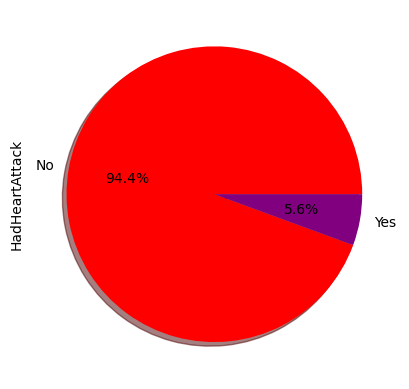

In [56]:
Heart_Attack_status = MidWestRegion["HadHeartAttack"].value_counts()
Heart_Attack_status.plot.pie(autopct = "%1.1f%%", colors=colors, shadow=True )
colors=['red', 'purple']

plt.show()

In [57]:
states_MidWest= MidWestRegion.groupby(["State"])["HadHeartAttack"].count()
states_MidWest

State
Illinois        2607
Indiana         5502
Iowa            5672
Kansas          6145
Michigan        5370
Minnesota       9161
Missouri        4195
Nebraska        5107
North Dakota    2498
Ohio            8995
South Dakota    4405
Wisconsin       6126
Name: HadHeartAttack, dtype: int64

In [75]:
No_Heart_attack_gender=MidWestRegion.groupby('Sex')['Sex'].count()
No_Heart_attack_gender

Sex
Female    33622
Male      32161
Name: Sex, dtype: int64

In [76]:
No_Heart_attack_gender_MidWest= MidWestRegion[MidWestRegion["HadHeartAttack"]==0].groupby("Sex").size()
No_Heart_attack_gender_MidWest.index

Index([], dtype='object', name='Sex')

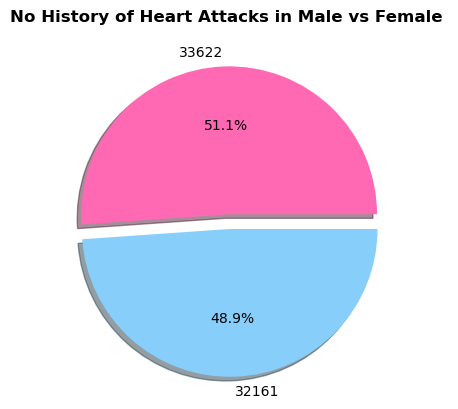

In [77]:
colors=['hotpink','lightskyblue']
labels=No_Heart_attack_gender
explode=(0, 0.1)
plt.pie(Sex_id,  explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("No History of Heart Attacks in Male vs Female ", fontweight='bold')
plt.show()

In [78]:
Heart_attack_gender=MidWestRegion[MidWestRegion["HadHeartAttack"]==1].groupby("Sex").size()
Heart_attack_gender

Series([], dtype: int64)

In [79]:
Heart_attack_gender

Series([], dtype: int64)

In [73]:
#Stroke Information section

In [11]:

Stroke_Status=MidWestRegion["HadStroke"].value_counts()
Stroke_Status

No     63146
Yes     2637
Name: HadStroke, dtype: int64

In [12]:
Stroke_Status_df=pd.DataFrame({"HadStroke":["Yes","No"],
                               "Total":["63146","2637"] })
Stroke_Status_df

,HadStroke,Total
0,Yes,63146
1,No,2637


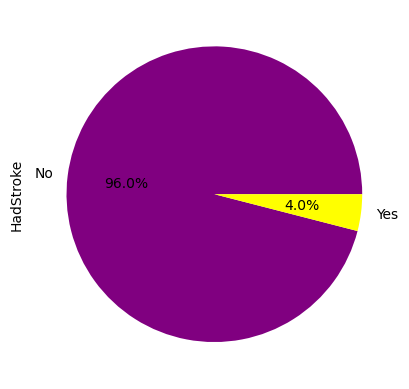

In [30]:
Stroke_Status = MidWestRegion["HadStroke"].value_counts()
Stroke_Status.plot.pie(autopct = "%1.1f%%", colors=colors)
colors=['purple', 'yellow']
plt.show()

In [19]:
#Smoker section

In [13]:

smoker_status = MidWestRegion["SmokerStatus"].value_counts()
smoker_status

Never smoked                             38554
Former smoker                            18212
Current smoker - now smokes every day     6742
Current smoker - now smokes some days     2275
Name: SmokerStatus, dtype: int64

In [14]:
smoker_status_df= pd.DataFrame({"Smoker Status": ["Never smoked", "Former smoker", "Current smoker-now smokes every day","Current smoker-now smokes some days"],
                               "Total": ["38554","18212","6342","2275"]})
smoker_status_df.head()

,Smoker Status,Total
0,Never smoked,38554
1,Former smoker,18212
2,Current smoker-now smokes every day,6342
3,Current smoker-now smokes some days,2275


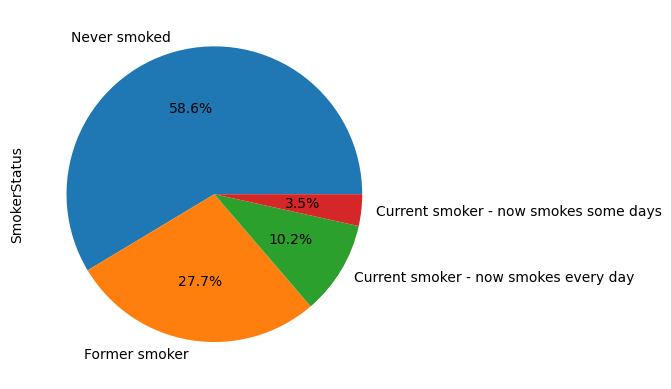

In [15]:
smoker_status = MidWestRegion["SmokerStatus"].value_counts()
smoker_status.plot.pie(autopct = "%1.1f%%")
plt.show()

In [ ]:
#E cigarette Section

In [16]:
Ecigarette_Status= MidWestRegion["ECigaretteUsage"].value_counts()
Ecigarette_Status

Never used e-cigarettes in my entire life    51382
Not at all (right now)                       11164
Use them some days                            1686
Use them every day                            1551
Name: ECigaretteUsage, dtype: int64

In [17]:
Ecigarette_Status_df= pd.DataFrame ({"ECigaretteUsage": ["Never used e-cigarettes in my entire life", "Not at all (right now)", "Use them every day", "Use them some days"],
                                     "Total":["51382","11164","1686","1551"]})
Ecigarette_Status_df
                                

,ECigaretteUsage,Total
0,Never used e-cigarettes in my entire life,51382
1,Not at all (right now),11164
2,Use them every day,1686
3,Use them some days,1551


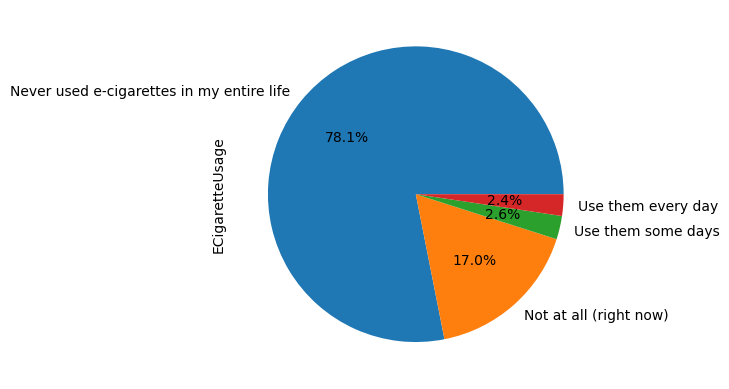

In [18]:
Ecigarette_Status = MidWestRegion["ECigaretteUsage"].value_counts()
Ecigarette_Status.plot.pie(autopct = "%1.1f%%")
plt.show()

In [ ]:
#Gender section

In [19]:
gender_count = MidWestRegion["Sex"].value_counts()
gender_count

Female    33622
Male      32161
Name: Sex, dtype: int64

In [20]:
gender_count_df=  pd.DataFrame ({"Sex":["Female","Male"],
                               "Total":[" 33622","32161"] })
gender_count_df.head()

,Sex,Total
0,Female,33622
1,Male,32161


In [ ]:
#BMI section

In [21]:
BMI_Average_States = MidWestRegion.groupby(["State"])["BMI"].mean()
BMI_Average_States

State
Illinois        28.759720
Indiana         29.493295
Iowa            29.416075
Kansas          29.109403
Michigan        28.658443
Minnesota       28.687714
Missouri        29.237654
Nebraska        29.283527
North Dakota    29.089143
Ohio            29.704753
South Dakota    29.131339
Wisconsin       29.290663
Name: BMI, dtype: float64

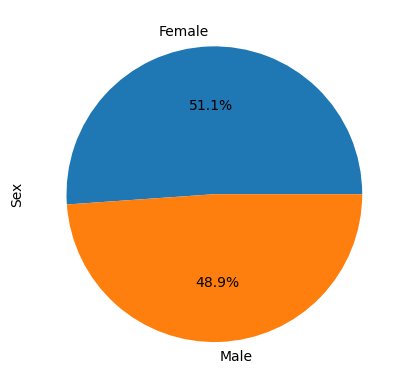

In [22]:
gender_count = MidWestRegion["Sex"].value_counts()
gender_count.plot.pie(autopct = "%1.1f%%")
plt.show()

In [ ]:
#Ethnnicity section

In [23]:
Ethnicity=  MidWestRegion["RaceEthnicityCategory"].value_counts()
Ethnicity

White only, Non-Hispanic         55712
Black only, Non-Hispanic          3863
Hispanic                          3021
Other race only, Non-Hispanic     2176
Multiracial, Non-Hispanic         1011
Name: RaceEthnicityCategory, dtype: int64

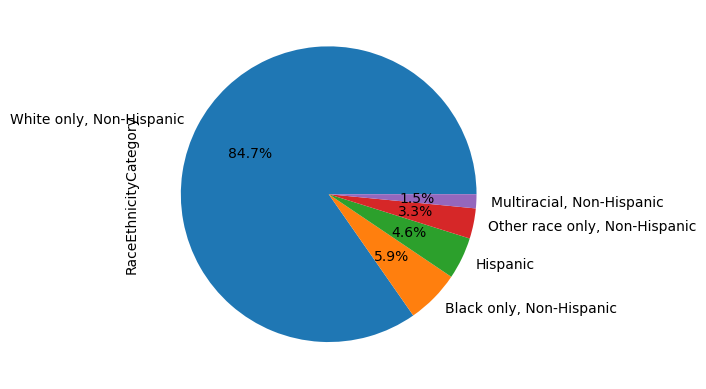

In [24]:
Ethnicity = MidWestRegion["RaceEthnicityCategory"].value_counts()
Ethnicity.plot.pie(autopct = "%1.1f%%")
plt.show()

In [ ]:
#General Health section 

In [25]:
General_Health=MidWestRegion.groupby(['GeneralHealth'])['State'].count()
General_Health

GeneralHealth
Excellent    10126
Fair          8026
Good         21253
Poor          2401
Very good    23977
Name: State, dtype: int64

In [27]:
General_Health=MidWestRegion[MidWestRegion['GeneralHealth']==1].groupby('State').count()
General_Health

,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
State,,,,,,,,,,,,,,,,,,,,,
